#Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import warnings
warnings.simplefilter("ignore")

#Data

(V, Q, Q_r, S_i, dS, TS_i, dTS, N_i, dN, M, DO, i, Sig/TS, Sig, TKN, X, Th, Th_c, Th_n, Th_cn)

In [ ]:
df = pd.read_csv('/content/ASP_Data.csv')
df.head(3)

,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,M,...,Sig,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn
0,3132,261,44,309,19,49,11,87,22,2634,...,192,1746.83,9.69,9.17,217,290,38,65,2.2925,11.217412
1,3105,220,37,271,22,44,11,88,23,2649,...,166,1561.05,10.50,9.21,183,249,33,65,2.3025,12.948892
2,2916,207,33,235,21,42,10,79,20,2543,...,140,1481.19,13.41,9.16,174,214,32,59,2.2900,16.777261


In [ ]:
psi_1 = 0.8
psi_2 = 0.2

#BOD Removal Regression 1

In [ ]:
df1 = pd.DataFrame()

df1['y'] = (df['V']*df['M'])/(2*df['Q']*df['dS']*df['dTS'])
df1['x1'] = 2/(df['Si']*df['Th'])*100
df1['x2'] = 1/df['Sig']*10

df1.head(3)

,y,x1,x2
0,0.037523,0.083564,0.052083
1,0.057816,0.098707,0.060241
2,0.067225,0.105479,0.071429


In [ ]:
x1 = df1.drop(['y'], axis = 1)
y1 = df1['y']

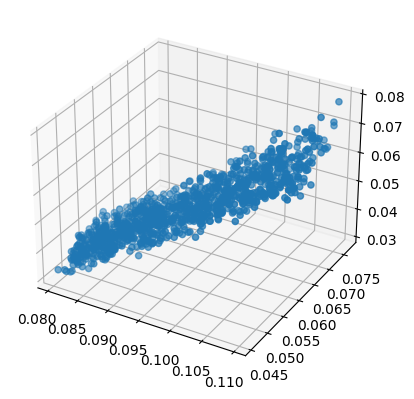

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'])
plt.show()

In [ ]:
def func1(vars, a, b, c):
  x11, x12 = vars
  return a*x12 + b*(x11**c)*x12

In [ ]:
ind_vars = np.vstack((df1['x1'], df1['x2']))

popt1, pcov1 = curve_fit(func1, ind_vars, df1['y'])

a1 = popt1[0]
b1 = popt1[1]
c1 = popt1[2]

###Equation

In [ ]:
print(f'y = ({a1:.2e}).x1 + ({b1:.2e}).(x2^({c1:.2e})).x1')

y = (-5.64e-01).x1 + (5.76e+00).(x2^(6.00e-01)).x1


In [ ]:
y1_pred = func1(ind_vars, *popt1)
r21 = r2_score(y1, y1_pred)
r21

0.8765826699400602

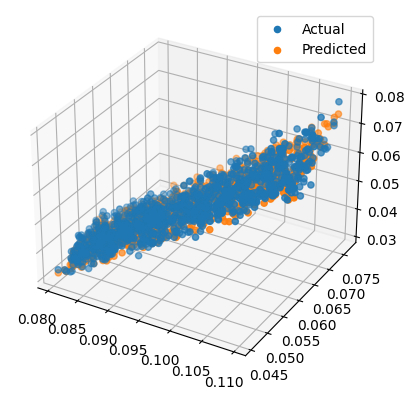

In [ ]:
fig = plt.figure()
axes = fig.add_subplot(111, projection='3d')
axes.scatter(df1['x1'], df1['x2'], df1['y'], label = "Actual")
axes.scatter(df1['x1'], df1['x2'], func1(ind_vars, a1, b1, c1), label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
lmda = c1
print(f'lmda = {lmda:.3f}')

lmda = 0.600


In [ ]:
# a = 1/(10*psi_1)
# b = Ks/((psi_1**(lmda+1))*k*(Kd**lmda)*(100**lmda))

In [ ]:
d1 = b1/((-a1)**lmda)
# d = Ks*(k**lmda-1)/(psi_1*(Kd**lmda))
print(f'd1 = {d1:.3f}')

d1 = 8.113


In [ ]:
d2 = b1/((-a1)**(lmda+1))
# d2 = Ks*(k**lmda)/(Kd**lmda)
print(f'd2 = {d2:.2f}')

d2 = 14.38


In [ ]:
psi_1 = 0.8
k = 1/(a1*psi_1)
print(f'k = {k:.3f}')

k = -2.215


#BOD Removal Regression 2

In [ ]:
df2 = pd.DataFrame()

# d1 = np.abs(d1)
# df2['y'] = 1/df['Th_c']
# df2['x'] = (20*d1/(d2*df['Si']*df['Th']))**lmda

df2['y'] = 1/df['Th_c']
df2['x'] = (1 + ((d1**lmda)*(10**(lmda*lmda))/((d2**(lmda-1))*(10**((lmda-1)*(lmda-1)))))*((2*df['Q']/(df['Si']*df['V']))**lmda))**(-1)

df2.head(3)

,y,x
0,0.103199,0.620160
1,0.095238,0.610631
2,0.074571,0.600428


In [ ]:
y2 = df2['y']
x2 = df2.drop(['y'], axis = 1)

In [ ]:
df2.corr()

,y,x
y,1.000000,0.530447
x,0.530447,1.000000


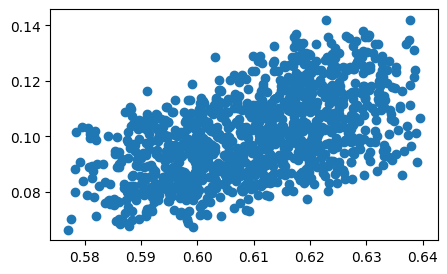

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x2, y2)
plt.show()

In [ ]:
# def func2(x, c1, c2, c3):
#   return c1/(1 + c3*x) - c2

def func2(x, c21, c22):
  return c21*x - c22

In [ ]:
# popt2, pcov2 = curve_fit(func2, df2['x'], df2['y'], p0 = [0.7226729 , 0.0850958 , 19.44141296])
popt2, pcov2 = curve_fit(func2, df2['x'], df2['y'])

c21 = popt2[0]
c22 = popt2[1]
# c24 = popt2[1]
# c25 = popt2[2]

popt2

array([0.57816681, 0.2525412 ])

###Equation

In [ ]:
print(f'[y + ({c22:.4f})].[({c23:.2f}).x + 1] = ({c21:.4f})')

[y + (0.2525)].[(2529279.29).x + 1] = (0.5782)


In [ ]:
y2_pred = func2(df2['x'], *popt2)
r22 = r2_score(df2['y'], y2_pred)
r22

0.28137390122719586

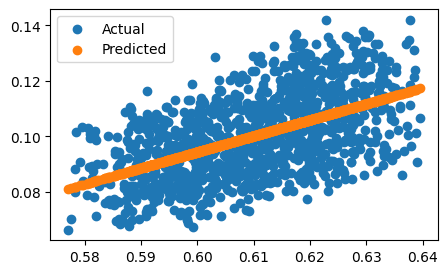

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x2, y2, label = "Actual")
plt.scatter(x2, y2_pred, label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
Kd = c22
print(f'Kd = {Kd:.4f}')

Kd = 0.2525


In [ ]:
Mu_max = c21
# Mu_max = 1/c24
print(f'Mu_max = {Mu_max:.4f}')

Mu_max = 0.5782


In [ ]:
Ks = d2*((-Kd/k)**lmda)
# Ks = c25*((-c22)**lmda)/c24
print(f'Ks = {Ks:.3f}')

Ks = 3.907


In [ ]:
# k = Ks/(d2*((-Kd)**lmda)*(10**(lmda-1)))
# print(f'k = {k:.2e}')

In [ ]:
Y = Mu_max/k
print(f'Y = {Y:.4f}')

Y = -0.2610


###Psi_1 Calc

In [ ]:
lmda_inv = (1/lmda).round(0) #approx. (in int)
lmda_inv

2.0

In [ ]:
df['psi_1'] = np.sqrt(np.abs(2*df['Q']*((np.abs(Mu_max*df['Th_c']*(1 - Kd*df['Th_c']) - Ks))**(1/lmda))/(Kd*df['Si']*df['V'])))

df['psi_1'].clip(lower = 0, upper = 1, inplace = True)
df.head(3)

,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,M,...,Q,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1
0,3132,261,44,309,19,49,11,87,22,2634,...,1746.83,9.69,9.17,217,290,38,65,2.2925,11.217412,1.0
1,3105,220,37,271,22,44,11,88,23,2649,...,1561.05,10.50,9.21,183,249,33,65,2.3025,12.948892,1.0
2,2916,207,33,235,21,42,10,79,20,2543,...,1481.19,13.41,9.16,174,214,32,59,2.2900,16.777261,1.0


#NH4-N Removal Regression 1

In [ ]:
df3 = pd.DataFrame()

df3['y'] = df['V']*df['M']/(2*df['Q']*df['dN']*df['dTS'])
df3['x1'] = 1/df['Sig']
df3['x2'] = ((2*df['Q'])/(df['Ni']*df['V']))**lmda
df3['x3'] = 1/(df['DO'])

df3.head(3)

,y,x1,x2,x3
0,0.214277,0.005208,0.103363,0.393701
1,0.320615,0.006024,0.103602,0.492611
2,0.365535,0.007143,0.107194,0.487805


In [ ]:
y3 = df3['y']
x3 = df3.drop(['y'], axis = 1)

In [ ]:
df3.corr()

,y,x1,x2,x3
y,1.000000,0.818506,0.737290,0.665093
x1,0.818506,1.000000,0.611826,0.700760
x2,0.737290,0.611826,1.000000,0.541612
x3,0.665093,0.700760,0.541612,1.000000


In [ ]:
def func3(vars, c1, c2, c3):
    x1, x2, x3 = vars
    return x1*(c1 + c2*x2)*(c3*x3 - 1)

In [ ]:
ind_vars3 = np.vstack((df3['x1'], df3['x2'], df3['x3']))

popt3, pcov3 = curve_fit(func3, ind_vars3, df3['y'])

c31 = popt3[0]
c32 = popt3[1]
c33 = popt3[2]

###Parameters

In [ ]:
print(f'y = x1.(({c31:.3f}) + ({c32:.1f}).x2).(({c33:.4f})*x3 - 1)')

y = x1.((3.481) + (-374.9).x2).((-0.5458)*x3 - 1)


In [ ]:
y3_pred = func3(ind_vars3, *popt3)
r23 = r2_score(y3, y3_pred)
r23

0.7672645163726413

###Constants

In [ ]:
lmdaN = lmda

In [ ]:
Ko = c33
print(f'Ko = {Ko:.3f}')

Ko = -0.546


In [ ]:
e1 = c22/(c21**lmda)
print(f'e1 = {e1:.4f}')

e1 = 0.3508


In [ ]:
e2 = c22/(c21**(lmda+1))
print(f'e2 = {e2:.4f}')

e2 = 0.6068


In [ ]:
psi_2 = 0.2
kn = 1/(c21*psi_2)
print(f'kn = {kn:.3f}')

kn = 8.648


#NH4-N Removal Regression 2

In [ ]:
df4 = pd.DataFrame()

# df4['y'] = (1 - Ko/df['DO'])*(1/(df['Th'])**lmdaN)
# df4['x1'] = (df['Th_cn']**2)*(df['Ni']**lmdaN)*(c33/(c32*(2**lmda)))
# df4['x2'] = df['Th_cn']*(df['Ni']**lmdaN)*(c33/(c32*(2**lmda)))
# df4['x3'] = (1 - Ko/df['DO'])*(df['Ni']**lmdaN)*(c33/(c32*(2**lmda)))

df4['y'] = 1/df['Th_cn']
df4['x'] = (1 + ((2*e1*df['Q']/(e2*df['Ni']*df['V']))**lmda)*e2)**(-1)

df4.head(3)

,y,x
0,0.089147,0.956802
1,0.077227,0.956706
2,0.059604,0.955272


In [ ]:
y4 = df4['y']
x4 = df4.drop(['y'], axis = 1)

In [ ]:
df4.corr()

,y,x
y,1.000000,0.150185
x,0.150185,1.000000


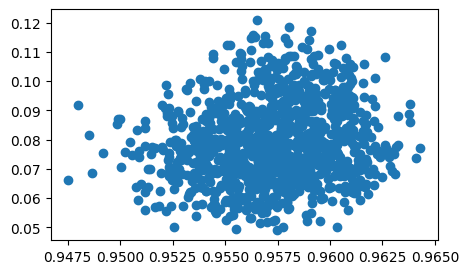

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x4, y4)
plt.show()

In [ ]:
def func4(x, c1, c2):
    return c1*x - c2

In [ ]:
popt4, pcov4 = curve_fit(func4, df4['x'], df4['y'])

c41 = popt4[0]
c42 = popt4[1]

###Parameters

In [ ]:
print(f'y = ({c21:.4f}).x - ({c42:.4f})')

y = (0.5782).x - (0.6295)


In [ ]:
y4_pred = func4(df4['x'], *popt4)
r24 = r2_score(y4, y4_pred)
r24

0.022555641006641647

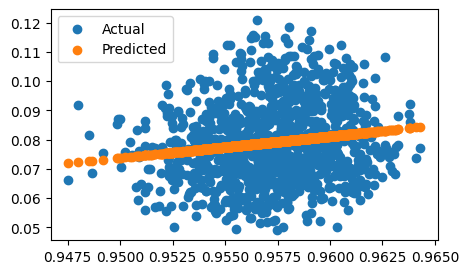

In [ ]:
plt.figure(figsize = (5, 3))
plt.scatter(x4, y4, label = "Actual")
plt.scatter(x4, y4_pred, label = "Predicted")
plt.legend()
plt.show()

###Constants

In [ ]:
Kdn = c42
print(f'Kdn = {Kdn:.4f}')

Kdn = 0.6295


In [ ]:
Mu_nm = c41
print(f'Mu_nm = {Mu_nm:.4f}')

Mu_nm = 0.7403


In [ ]:
Kn = e2*((Kdn/kn)**lmda)
print(f'kn = {kn:.3f}')

kn = 8.648


###Psi_2 Calc

In [ ]:
lmdaN_inv = (1/lmdaN).round(0).astype(int)
lmdaN_inv

2

In [ ]:
df['psi_2'] = np.sqrt(2*df['Q']/(Kdn*df['Ni']*df['V']*((np.abs((Mu_nm*(Ko/df['DO'] + 1)*df['Th_cn']*(1 - Kdn*df['Th_cn']) - Kn)))**(1/lmda))))

df.head(3)

,V,Si,So,TSi,TSo,Ni,No,TKNi,TKNo,M,...,Th_c,Th,dS,dTS,dN,TKN,Thn,Th_cn,psi_1,psi_2
0,3132,261,44,309,19,49,11,87,22,2634,...,9.69,9.17,217,290,38,65,2.2925,11.217412,1.0,0.008858
1,3105,220,37,271,22,44,11,88,23,2649,...,10.50,9.21,183,249,33,65,2.3025,12.948892,1.0,0.007284
2,2916,207,33,235,21,42,10,79,20,2543,...,13.41,9.16,174,214,32,59,2.2900,16.777261,1.0,0.004731


#Results

####Psi_1

In [ ]:
psi_1 = df['psi_1'].mean()
psi_1_min = df['psi_1'].min()
psi_1_max = df['psi_1'].max()

print(f'psi_1 :\n Range       : ({psi_1_min:.3f}, {psi_1_max:.3f})')
print(f' Mean Value  : {psi_1:.4f}')

psi_1 :
 Range       : (0.624, 1.000)
 Mean Value  : 0.9548


####Psi_2

In [ ]:
psi_2 = df['psi_2'].mean()
psi_2_min = df['psi_2'].min()
psi_2_max = df['psi_2'].max()

print(f'psi_2 :\n Range       : ({psi_2_min:.3f}, {psi_2_max:.3f})')
print(f' Mean Value  : {psi_2:.4f}')

psi_2 :
 Range       : (0.003, 0.016)
 Mean Value  : 0.0076


In [ ]:
print(f'Mu_max = {Mu_max:.1f}')
print(f'Mu_nm = {Mu_nm:.2f}\n')
print(f'Kd = {Kd:.3f}')
print(f'Kdn = {Kdn:.3f}\n')
print(f'Ks = {Ks:.3f}')
print(f'Kn = {Kn:.4f}')

Mu_max = 0.6
Mu_nm = 0.74

Kd = 0.253
Kdn = 0.629

Ks = 3.907
Kn = 0.1260
